In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

#Classification
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale

In [2]:
def classification_(X,y): 
    lgbc=LGBMClassifier()
    xgbc=XGBClassifier()
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    
    algos=[lgbc, xgbc,g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['LGBMClassifier','XGBClassifier','Gaussian','Bernoulli','KNeighbors','SVC','DecisionTree','LogisticReg','GradientBoosting','MultinominalNB','RandomForest','AdaBoost']

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=101)

    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        predict=i.fit(X_train,y_train).predict(X_test)
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict))
        recall.append(recall_score(y_test,predict))
        f1.append(f1_score(y_test,predict))
      
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    return result.sort_values('AccuracyScore',ascending=False)

## Import Data

In [3]:
df_train = pd.read_csv('../input/spaceship-titanic/train.csv')
train_labels = df_train.Transported
df_test = pd.read_csv('../input/spaceship-titanic/test.csv')
submission = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")

In [4]:
print(df_train.shape)
df_train.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
print(df_test.shape)
df_test.head()

(4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
df = df_train.append(df_test)
df.drop(columns='Transported', inplace=True)
print(df.shape)
df.head()

(12970, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


## EDA

In [7]:
df.nunique()

PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.4+ MB


In [9]:
df.isnull().mean()

PassengerId     0.000000
HomePlanet      0.022205
CryoSleep       0.023901
Cabin           0.023053
Destination     0.021126
Age             0.020817
VIP             0.022822
RoomService     0.020278
FoodCourt       0.022282
ShoppingMall    0.023593
Spa             0.021897
VRDeck          0.020663
Name            0.022668
dtype: float64

## Data Visualization

<AxesSubplot:>

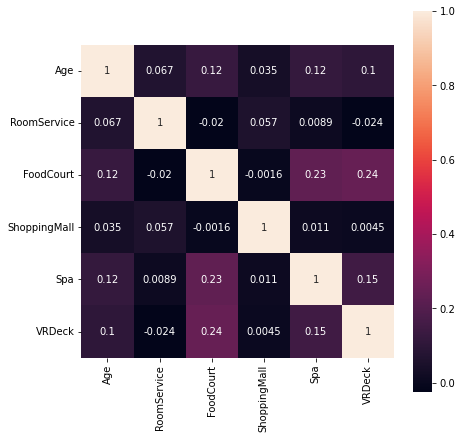

In [10]:
plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(), square=True, annot=True)

## Feature Enginnering

### PassengerId

In [11]:
df['GroupId']=df.PassengerId.str[:4].astype(int) # PassengerId nin ilk 4 rakami GroupId dir
df['GroupSize']=df.GroupId.map(lambda x: df.GroupId.value_counts()[x])

In [12]:
df.GroupId.value_counts()[3] # 3 numarali grupta kac kisi var

2

In [13]:
group_id_home = df.groupby('GroupId')['HomePlanet'].agg([pd.Series.mode, np.size])
group_id_home

,mode,size
GroupId,,
1,Europa,1
2,Earth,1
3,Europa,2
4,Earth,1
5,Earth,1
...,...,...
9276,Europa,1
9277,Earth,1
9278,Earth,1


### Cabin

In [14]:
df['Deck']=df.Cabin.str[0]
df['Side']=df.Cabin.str[-1]

## Prediction

In [15]:
df_dummies = pd.get_dummies(df.drop(columns=['PassengerId', 'GroupId', 'Cabin', 'Name']), drop_first=True)

In [16]:
df_dummies.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSize,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,2,1,0,0,0,1,1,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [17]:
df_train_dm = df_dummies[:df_train.shape[0]] 
df_test_dm = df_dummies[df_train.shape[0]:]

In [18]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer() # default olarak mean ile doldurur
df_train_imputed = my_imputer.fit_transform(df_train_dm)
df_test_imputed = my_imputer.transform(df_test_dm)

## Prediction

In [19]:
classification_(df_train_imputed, train_labels)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
GradientBoosting,0.806210,0.779553,0.849188,0.812882
LGBMClassifier,0.803335,0.786344,0.828306,0.806780
AdaBoost,0.801035,0.783516,0.827146,0.804740
XGBClassifier,0.795285,0.784910,0.808585,0.796571
RandomForest,0.795285,0.812346,0.763341,0.787081
LogisticReg,0.793560,0.777288,0.817865,0.797060
SVC,0.787809,0.740019,0.881671,0.804659
KNeighbors,0.757907,0.743646,0.780742,0.761743
MultinominalNB,0.756757,0.705717,0.873550,0.780715
Bernoulli,0.748706,0.779974,0.686775,0.730413


In [20]:
gbc=GradientBoostingClassifier()
model = gbc.fit(df_train_imputed, train_labels)
pred = model.predict(df_test_imputed)
pred

array([ True, False,  True, ...,  True,  True,  True])

#### Feature Importance

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

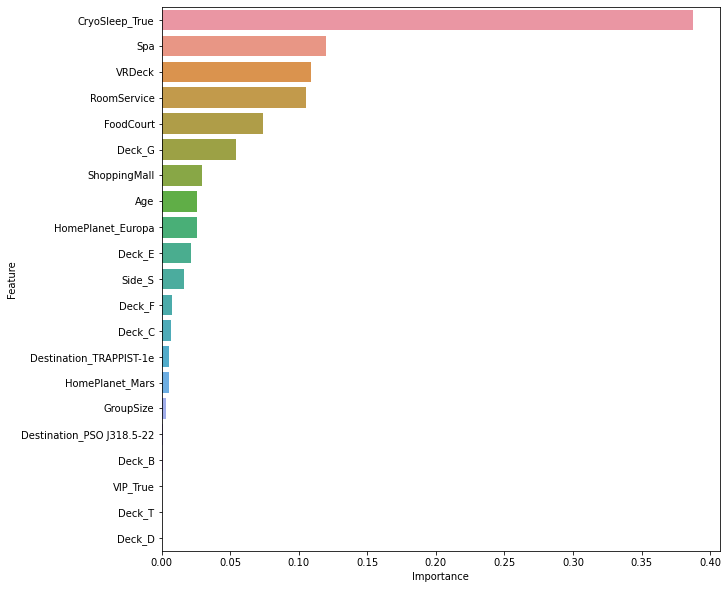

In [21]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, df_train_dm.columns)), columns=['Importance', 'Feature'])
plt.figure(figsize=(10,10))
sns.barplot(x='Importance', y='Feature', data=feature_imp.sort_values(by='Importance', ascending=False))

## Submission

In [22]:
submission['PassengerId']=df[df_train.shape[0]:].PassengerId
submission['Transported']=pred
submission.replace({1:'True', 0:'False'}, inplace=True)
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
